# Abstract
In this experiment, we applied logistic regression with different  hyperparameter settings on the dataset NumtaDB. We got testing accuracy of 60.68% from the best model among three different model.

# Problem Definition
The main objective of this experiment is design a binary classification model that can recongnize  `[0-9]` Bengali handwritten digits using logistic regression with different hyperparameter settings.

# Dataset
Ekush is multipurpose and multitype comphrehensive database for bengali handwritten character. In this experiment we will consider the dataset for recongnizing male/female from handwritten digits. For that we consider two CSV file named male_digits and female_digits which are the converted from image dataset to reduce I/0 time. After  merging the two csv file we got 30830 rows with 785 columns(784 features and 1 label).

**Snapshot from Ekush**

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>

# Workflow of Methodology
I characterize the complete work flow into nine steps.

1. Data Preprocessing.
2. Normalize the data.
3. Train-Test split.
4. Setting up hyperparameters.
5. Initialize Logistic regression model, loss and optimizer.
6. Training data and evaluation on testing data interms of loss and accuracy.
7. Save Model.
8. Build Binary classification model
9. Prediction of male/female from digits.


# Preprocessing of Data
Csv files are consist of 784 features and 1 label where labels are for the digits.But in out problem we have to predict the male or m=female handwritten digits. So we have to manuall label the dataset for our task. First we remove the labels then merged the two csv files:maledigits.csv and femaledigits.csv. After that i manually label the maledigits.csv as 0 and femaledigits.csv as 1. Finally deivide the features with 255 to make the features value between [0,1] to reduce processing time. For normalizing we use standardscaler of sklearn package and convert it to torch tensor for convenient our task.The standard scaler function works like $featurevalue=(featurevalue-mean)/s.deviation$ where the value of mean and standard deviation is 0.5.

# Logistic Regression

Logistic regression is supervised machine learning classification algorithm.Though it is known as regression but the output of the algorithm is discrete value[0,1]. The goal of logistic regression is to minimize the error between its predictions and training data. This algorithm is pretty similar to linear regression but the difference is in logistic regression there used sigmoid activation function which made the decision boundary curved.

$$s= \sigma(w^Tx+b)=\sigma(z)=\frac{1}{1+e^{-z}} $$

# Loss Function and Optimizer

In this experiment, I used two types of loss function: Binary Crossentropy loss(BCEloss) and Mean square error(MSELoss). BCEloss perform better in this experiment on the other hand MSEloss value is too high.

For BCELoss:

$$\ J(w,b)=\frac{1}{m}\sum_{i=1}^{m} L(\bar{y^{i}},{y^i})=-\frac{1}{m}\sum_{i=1}^{m}[y^ilog(\bar{y^i})+(1-y^i)log(\bar{1-y^i})]$$



To optimize the loss function i used two types of optimizer:SGD and Adam with different learning rate and number of iteration.


# Experimental Setup

In this experiment i used pytorch API and google colab with various python packages: numpy, pandas, matplotlib. I got access pytorch version 1.7.0+cu101 with T4 Tesla GPU from colab. It takes more than 4 hour to complete the task.

# Train-Test Splitting Ratio

The entire dataset is splitted with proportion to 90:10 data are assinged randomly in training and testing data. Training dataset contains 27747 data and test data contains 3083 data.

# Result Analysis

I tried this experiment with different hyperparameter settings. Here i visualize the best three experimented settings.This models achieved accuracy of 60.49%, 57.24% and 60.68% respectively. 

**Hyper parameter settings**

| Settings 1       | Settings 2       | Settings 3     |
|:-------------    | :------------:   | -----------:   |
|L_rate=0.01       | L_rate=0.01      | L_rate=0.0001  |
|Optimizer:SGD     | Optimizer:SGD    | Optimizer:Adam |
|num_iter=6000     | num_iter=1000   | num_iter=1000 |
|Binary_cross_entropy | MSELoss     | Binary_cross_entropy | |



# Result Comparison

**Loss Graphs**
<div align="center">
<div class="column">
  <img src="https://drive.google.com/uc?id=1_dlC510lkcyMEar6JrGOhLtXhGoD-Aiw" width="700">
  </div>
  </div>

From the loss graph, we can see that the loss is gradually  decreasing in all the settings. When we apply BCEloss (Fig:1 and 3) the loss curve is decreasing and value is moderately good but when we apply MSEloss the loss values ar too high and at a point the loss value are again increasing which affect the accuracy graph.

**Accuracy Graphs**
  <div align="center">
<div class="column">
  <img src="https://drive.google.com/uc?id=1YUW_wqA0nQfp5zbf2SROT_Vdob8L2csS" width="700">
  </div>
  </div>

From the accuracy graph,we can say that the accuracy graph of fig 1 and 3 is increasing gradually but the fig 2 graph is abnormal that mayb cause of loss function which is not a optimized loss function for this dataset.The accuracy of the settings 1, settings 2 and settings 3 are 60.49%, 57.24% and 60.68% respectively.



# Implementation/Code

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
import zipfile
from os import path
import shutil

# Define data path
data_path = '/content/drive/MyDrive/digits/'
data_dir_list = os.listdir(data_path)
print(data_dir_list)

['femaleDigits.csv', 'maleDigits.csv']


In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(data_path + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df


In [ ]:
male_csv=showRawTrainingSamples('maleDigits.csv')
female_csv=showRawTrainingSamples('femaleDigits.csv')

maleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)
femaleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


In [ ]:
total_csv = [male_csv,female_csv]
#total_csv = [a_csv,d_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))



30830


In [ ]:
#Y_train = merged_csv["label"]
train = merged_csv.drop(labels = ["label"],axis = 1)
# Normalize the data
train = train / 255.0

# Reshape the array into 28 x 28 pixel
#train = train.values.reshape(-1,28,28,1)

In [ ]:
print(train)

         pixel0    pixel1    pixel2  ...  pixel781  pixel782  pixel783
0      0.000000  0.007843  0.000000  ...  0.015686  0.003922  0.003922
1      0.000000  0.000000  0.000000  ...  0.003922  0.000000  0.000000
2      0.003922  0.000000  0.000000  ...  0.003922  0.003922  0.007843
3      0.007843  0.003922  0.003922  ...  0.000000  0.000000  0.007843
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
...         ...       ...       ...  ...       ...       ...       ...
15617  0.000000  0.003922  0.000000  ...  0.000000  0.000000  0.000000
15618  0.000000  0.000000  0.000000  ...  0.003922  0.000000  0.003922
15619  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
15620  0.003922  0.003922  0.003922  ...  0.000000  0.000000  0.000000
15621  0.003922  0.007843  0.000000  ...  0.000000  0.003922  0.000000

[30830 rows x 784 columns]


tensor([0.])


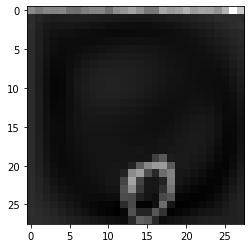

In [ ]:
## Displaying a MNIST Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = X_train[50].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

print(y_train[50])

In [ ]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Define the number of classes
num_classes = 2
num_of_samples = train.shape[0]
labelss = np.ones((num_of_samples,),dtype='float32')

labelss[0:15207]=0
labelss[15207:]=1


names = ['male','female']


In [ ]:
#Shuffle the dataset
x,y = shuffle(train,labelss, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)
input_features=x.shape
print(input_features)

(30830, 784)


In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

print(X_train.shape)

torch.Size([27747, 784])


In [ ]:
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

print(y_train)

tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size,1)

    def forward(self, x):
        y_predicted=torch.sigmoid(self.linear(x))
        return y_predicted

In [ ]:
input_features=28*28
model=LogisticRegressionModel(input_features)


# Settings 1

In [ ]:
#Hyperparametr
learning_rate=0.01
criterion=nn.BCELoss()
#criterion = torch.nn.MSELoss(reduction='sum')
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_iters=6000

In [ ]:

num_epochs=6000
iteration_loss = []
iteration_accuracy = []
for epoch in range(num_epochs):
  y_predicted=model(X_train)
  #loss=criterion(y_predicted,y_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%500==0:
    correct=0
    total=0
    
    
    

    y_predicted=model(X_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total
    iteration_accuracy.append(accuracy)    
    print(f'epoch:{epoch+1},loss={loss.item():.4f}',accuracy)
    iteration_loss.append(loss.item())

epoch:500,loss=0.6596 59.19558871229322
epoch:1000,loss=0.6567 59.876743431722346
epoch:1500,loss=0.6551 59.876743431722346
epoch:2000,loss=0.6540 59.4550762244567
epoch:2500,loss=0.6532 59.61725591955887
epoch:3000,loss=0.6525 59.81187155368148
epoch:3500,loss=0.6520 60.03892312682452
epoch:4000,loss=0.6515 60.33084657800843
epoch:4500,loss=0.6511 60.36328251702887
epoch:5000,loss=0.6508 60.52546221213104
epoch:5500,loss=0.6505 60.42815439506974
epoch:6000,loss=0.6502 60.49302627311061


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')


tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])
accuracy=0.6049


[0.6596119403839111, 0.6566710472106934, 0.6550747752189636, 0.6539829969406128, 0.6531601548194885, 0.6525058746337891, 0.6519675850868225, 0.6515144109725952, 0.6511262059211731, 0.6507893800735474, 0.650493860244751, 0.6502325534820557]


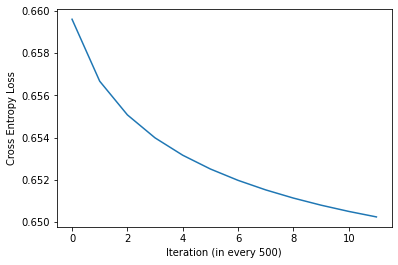

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[59.19558871229322, 59.876743431722346, 59.876743431722346, 59.4550762244567, 59.61725591955887, 59.81187155368148, 60.03892312682452, 60.33084657800843, 60.36328251702887, 60.52546221213104, 60.42815439506974, 60.49302627311061]


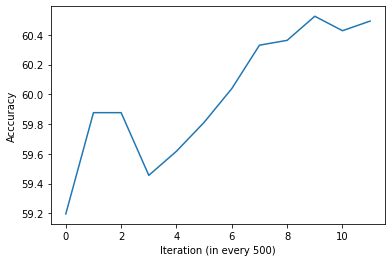

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Acccuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/drive/My Drive/Assignment2/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'EkushDB_logistic_1.pkl')

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'EkushDB_logistic_1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test[5:10])
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  #acc=y_predicted_cls.eq(y_test[0:5]).sum()/float(y_test.shape[0])
  #print(f'accuracy={acc:.4f}')

  print(y_test[5:10])

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


# Settings 2

In [ ]:
#Hyperparameter
learning_rate=0.01
#criterion=nn.BCELoss()
criterion = torch.nn.MSELoss(reduction='sum')
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_iter=1000

In [ ]:
num_epochs=1000
iteration_loss = []
iteration_accuracy = []
for epoch in range(num_epochs):
  y_predicted=model(X_train)
  #loss=criterion(y_predicted,y_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%200==0:
    correct=0
    total=0
    y_predicted=model(X_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total
    iteration_accuracy.append(accuracy)    
    print(f'epoch:{epoch+1},loss={loss.item():.4f}',accuracy)
    iteration_loss.append(loss.item())

epoch:200,loss=11943.2764 57.47648394421019
epoch:400,loss=11830.9668 57.0223807979241
epoch:600,loss=11769.0049 56.98994485890366
epoch:800,loss=11733.1299 57.08725267596497
epoch:1000,loss=11750.9707 57.249432371067144


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')


tensor([[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [0.]])
accuracy=0.5725


[11943.2763671875, 11830.966796875, 11769.0048828125, 11733.1298828125, 11750.970703125]


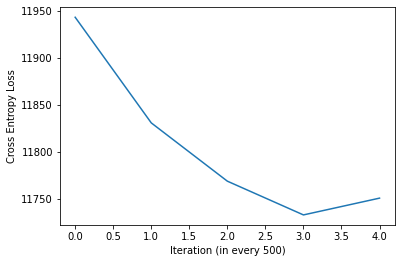

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[57.47648394421019, 57.0223807979241, 56.98994485890366, 57.08725267596497, 57.249432371067144]


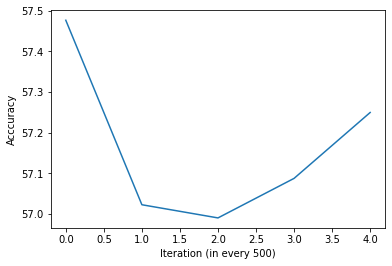

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Acccuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/drive/My Drive/Assignment2/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'EkushDB_logistic_2.pkl')

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'EkushDB_logistic_2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test[5:10])
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  #acc=y_predicted_cls.eq(y_test[0:5]).sum()/float(y_test.shape[0])
  #print(f'accuracy={acc:.4f}')

  print(y_test[5:10])

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


# Settings 3

In [ ]:
#Hyperparameter
learning_rate=0.0001
criterion=nn.BCELoss()
#criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
number_iter=1000


In [ ]:
num_epochs=1000
iteration_loss = []
iteration_accuracy = []
for epoch in range(num_epochs):
  y_predicted=model(X_train)
  #loss=criterion(y_predicted,y_train)
  loss=criterion(y_predicted,y_train)
  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%200==0:
    correct=0
    total=0
    y_predicted=model(X_test)
    y_predicted_cls=y_predicted.round()
    total+=y_test.size(0)
    correct += (y_predicted_cls == y_test).sum()
    accuracy = 100 * correct.item() / total
    iteration_accuracy.append(accuracy)    
    print(f'epoch:{epoch+1},loss={loss.item():.4f}',accuracy)
    iteration_loss.append(loss.item())
    

epoch:200,loss=0.6665 59.68212779759974
epoch:400,loss=0.6605 60.59033409017191
epoch:600,loss=0.6574 60.33084657800843
epoch:800,loss=0.6554 60.687641907233214
epoch:1000,loss=0.6538 60.687641907233214


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')


tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])
accuracy=0.6069


[0.6665189266204834, 0.6605004668235779, 0.6574115753173828, 0.6553558707237244, 0.6538389921188354]


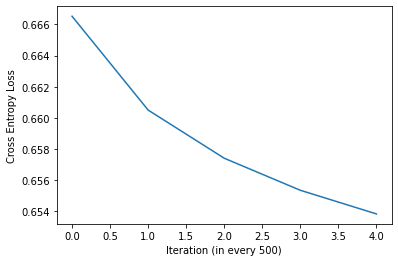

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[59.68212779759974, 60.59033409017191, 60.33084657800843, 60.687641907233214, 60.687641907233214]


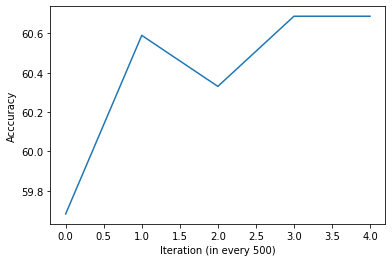

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

print (iteration_accuracy)
plt.plot(iteration_accuracy)
plt.ylabel('Acccuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Save Model**

In [ ]:
root_path = '/content/drive/My Drive/Assignment2/'

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'EkushDB_logistic_3.pkl')

**Load Model**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'EkushDB_logistic_3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
with torch.no_grad():
  y_predicted=model(X_test[10:20])
  y_predicted_cls=y_predicted.round()
  print(y_predicted_cls)
  #acc=y_predicted_cls.eq(y_test[10:20]).sum()/float(y_test.shape[0])
  #print(f'accuracy={acc:.4f}')

  print(y_test[10:20])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])


# Conclusion

From the above observation we can come to a conclusion that the models accuracy is moderate in different hyperparameter settings as we applied logistic regression.Logistic regression is simple classification model in machine learning. We might get better accuracy if we experiment on neural network model.